In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys 
import matplotlib.ticker as ticker
import os
import glob
import plotly.graph_objects as go # install plotly if you dont have it
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_colwidth', None)

# Read in Wikidata

In [2]:
df = pd.read_csv('../datasets/wiki_events.csv')
df

,Unnamed: 0,Year,Event
0,0,2015,January 1: Five former Soviet Union countries form the Eurasian Economic Union.
1,1,2015,"January 3–January 7|7: Boko Haram perpetrates 2015 Baga massacre|a massacre of over 2,000 people in Baga, Nigeria, and allies itself with Islamic State in Iraq and the Levant|ISIL."
2,2,2015,"April 2: Al-Shabaab (militant group)|Al-Shabaab perpetrates a Garissa University College attack|mass shooting in Kenya, killing 148."
3,3,2015,"April 25–May 3: The Death of Freddie Gray|death of an African-American man, Freddie Gray by police leads to 2015 Baltimore protests|violent unrest in Baltimore, Maryland."
4,4,2015,May 3: Floyd Mayweather Jr. vs. Manny Pacquiao.
...,...,...,...
179,179,2020,The United States signs a tentative Afghan peace process|peace agreement with the Taliban.
180,180,2020,"Silurian millipede ''Kampecaris obanensis'', the oldest known land animal, is discovered in Scotland."
181,181,2020,"China and India engage in 2020 China–India skirmishes|border skirmishes, the largest escalation between the two powers in 50 years."
182,182,2020,China launches Chang'e 5 and becomes the third country after the United States and the Soviet Union to return samples of the moon.


## Separate Wiki Events data by year

In [3]:
date_list = df.Year.unique()
date_list = sorted(date_list)

In [4]:
date_list

[2015, 2016, 2017, 2018, 2019, 2020]

## 2015 

In [5]:
for date in date_list:
    temp = df[df['Year'] == date] 
    new_df = temp.Event.str.split(expand=True).stack().value_counts().reset_index()
    new_df.columns = ['Word', 'Frequency'] 
    new_df
    break

## We get all the unique words from the 2015 "trending events" and put them into a list

In [6]:
new_df

,Word,Frequency
0,of,15
1,the,14
2,in,12
3,2015,10
4,and,7
...,...,...
238,30:,1
239,Russia,1
240,begins,1
241,Russian,1


In [7]:
word_list = new_df.Word.unique()

## Now we count our metadata word counts and apply a filter of wiki events words

In [8]:
data_2015 = pd.read_csv('../datasets/yearly/2015_videos.csv.gz')
counts_2015 = data_2015.video_info.str.split(expand=True).stack().value_counts().reset_index()
counts_2015.columns = ['Word', 'Frequency'] 
counts_2015

,Word,Frequency
0,news,258530
1,-,211397
2,us,187672
3,follow,179227
4,subscribe,149739
...,...,...
900910,safer':,1
900911,'baffles,1
900912,http://blogs.rollcall.com/white-house/how-syrian-refugees-get-to-the-united-states/?dcz=,1
900913,http://blogs.rollcall.com/wgdb/mcconnell-pause-syrian-refugees/,1


In [30]:
# Side Quest: We count how many words frequencies occur
freq_squared = counts_2015.Frequency.value_counts().reset_index()
freq_squared.columns = ['Count', 'Frequency'] 
freq_squared


,Count,Frequency
0,1,534202
1,2,121330
2,3,50683
3,4,31084
4,5,20403
...,...,...
3538,3276,1
3539,1199,1
3540,3275,1
3541,2054,1


In [36]:
freq_squared = freq_squared.sort_values(['Count'], ascending=[1])
freq_squared

,Count,Frequency
0,1,534202
1,2,121330
2,3,50683
3,4,31084
4,5,20403
...,...,...
2371,149739,1
2370,179227,1
2369,187672,1
1839,211397,1


#### How to read above table.

- e.g. A word showed up only once (Count), 534202 times (Frequency). 

- e.g. A word showed up twice (Count), 121330 times (Frequency). 

This plot is supposed to demonstarte that we have some trendy words within our data. For example One word showed up 258530 times making it very popular word amongst our 2015 data

(array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
          22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
          33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
          44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
          55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
          66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
          77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
          88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
          99,  100,  101,  102,  103,  104,  105,  106,  107,  108,  109,
         110,  111,  112,  113,  114,  115,  116,  117,  118,  119,  120,
         121,  122,  123,  124,  125,  126,  127,  128,  129,  130,  131,
         132,  133,  134,  135,  136,  137,  138,  139,  140,  141,  142,
         143,  144,  145,  146,  147, 

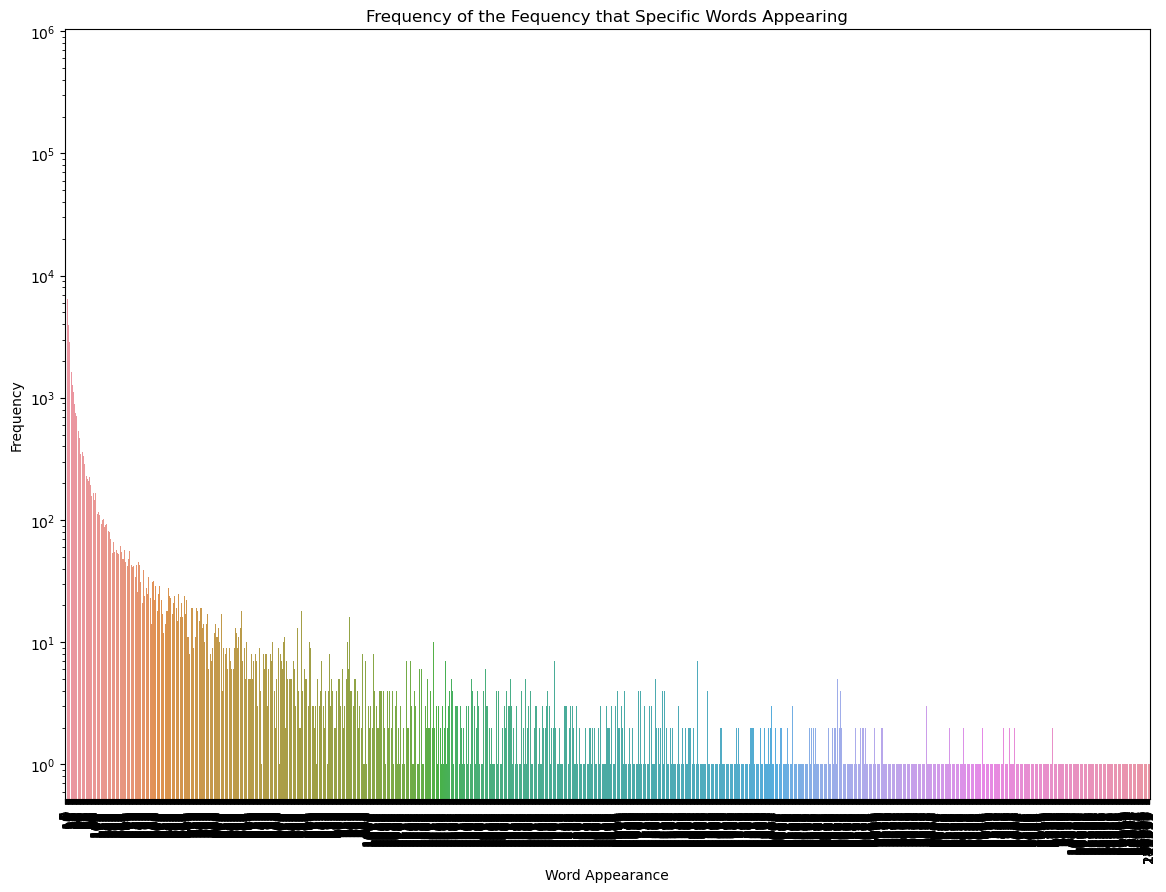

In [38]:
fig = plt.figure(figsize=(14, 10))
sns.barplot(data=freq_squared, x="Count", y="Frequency")
plt.title("Frequency of the Fequency that Specific Words Appearing")
plt.xlabel("Word Appearance")
plt.ylabel("Frequency")
plt.yscale("log")
plt.xticks(rotation=90)

In [17]:
data_2015.shape

(502336, 7)

## Filter our 2015 metadata with the wiki events words

In [24]:
df_words_2015 = counts_2015[counts_2015['Word'].isin(word_list)]
df_words_2015.reset_index(inplace=True)
df_words_2015["Word"] = df_words_2015['Word'].str.replace('[^\w\s]','')

# we add the index with the word to see what ranked popular word is kept after applying the filter
df_words_2015['Word'] = df_words_2015['Word'].astype(str) + " (" + df_words_2015['index'].astype(str) + ")"
df_words_2015

/var/folders/q3/z0pdr58n4bn46rs6tvs5t1y00000gn/T/ipykernel_4416/3424154348.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_words_2015["Word"] = df_words_2015['Word'].str.replace('[^\w\s]','')
/var/folders/q3/z0pdr58n4bn46rs6tvs5t1y00000gn/T/ipykernel_4416/3424154348.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_words_2015["Word"] = df_words_2015['Word'].str.replace('[^\w\s]','')
/var/folders/q3/z0pdr58n4bn46rs6tvs5t1y00000gn/T/ipykernel_4416/3424154348.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,index,Word,Frequency
0,18,police (18),48931
1,21,2015 (21),46455
2,22,people (22),45708
3,26,first (26),43748
4,74,time (74),22981
...,...,...,...
87,42631,reached (42631),36
88,48208,marry (48208),30
89,106727,9525 (106727),9
90,115250,naledi (115250),8


This plot demonstartes that some words were very popular showing the frequency and the index compared to its row size.

- In our case we have the 18th, 21st, 22nd,... most frequent words out of 900,915 unique words of our metadata
- We can also see some words like "naledi (115250)" was not caught as a trend by youtube as it ranks 115250th place amonst 900,915 unique words and has a total frequency of just 8 counts

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91]),
 [Text(0, 0, 'police (18)'),
  Text(1, 0, '2015 (21)'),
  Text(2, 0, 'people (22)'),
  Text(3, 0, 'first (26)'),
  Text(4, 0, 'time (74)'),
  Text(5, 0, 'full (84)'),
  Text(6, 0, 'former (104)'),
  Text(7, 0, 'found (132)'),
  Text(8, 0, 'since (162)'),
  Text(9, 0, 'end (189)'),
  Text(10, 0, 'military (234)'),
  Text(11, 0, 'shooting (273)'),
  Text(12, 0, 'right (304)'),
  Text(13, 0, 'water (306)'),
  Text(14, 0, 'policy (334)'),
  Text(15, 0, 'program (337)'),
  Text(16, 0, 'series (428)'),
  Text(17, 0, 'nuclear (434)'),
  Text(18, 0, 'early (483)'),
  Text(19, 0, 'att

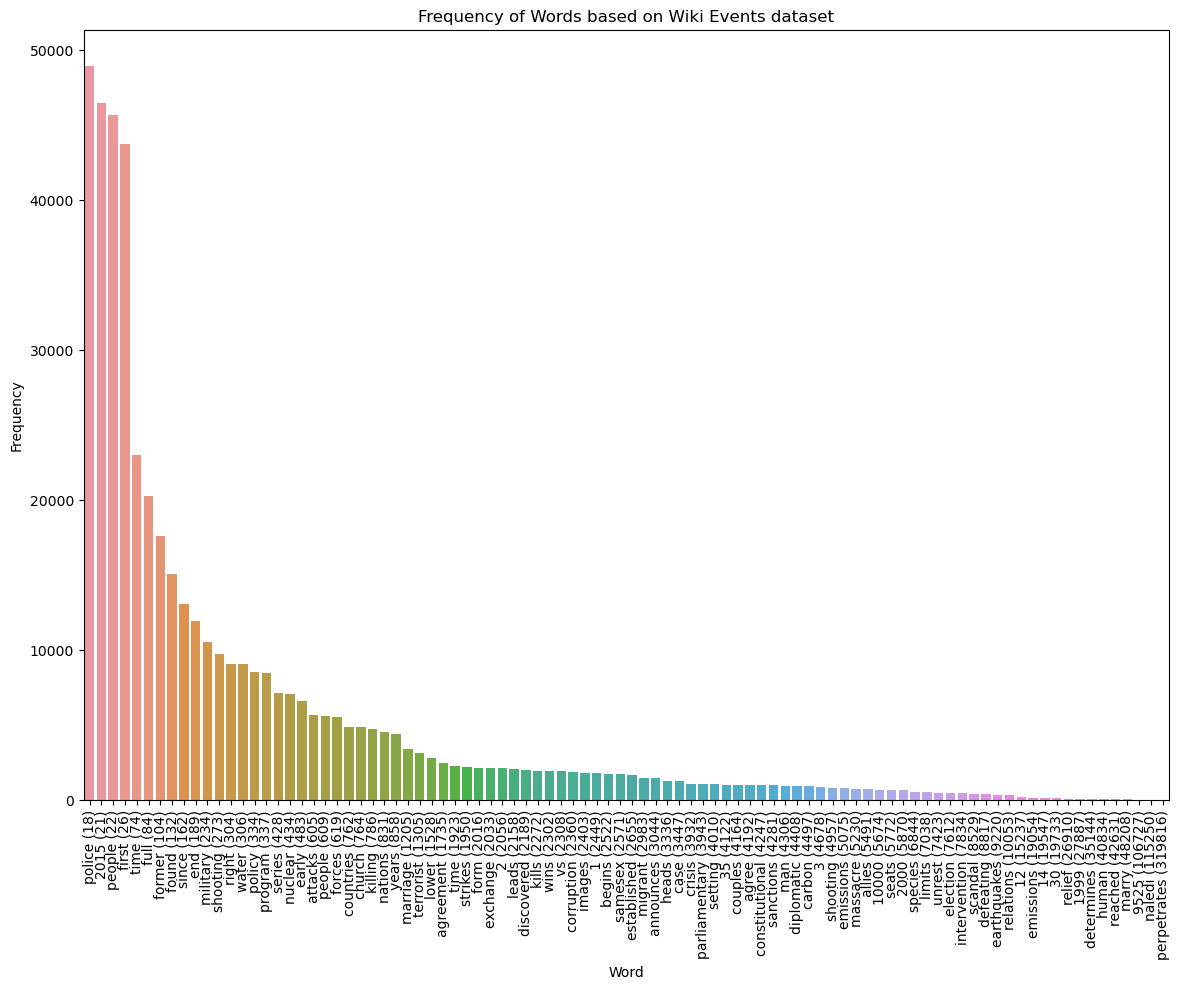

In [26]:
fig = plt.figure(figsize=(14, 10))
sns.barplot(data=df_words_2015, x="Word", y="Frequency")
plt.title("Frequency of Words based on Wiki Events dataset")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=90)

# 2016

- less exploration more just analysis

In [39]:
data_2016 = pd.read_csv('../datasets/yearly/2016_videos.csv.gz')
counts_2016 = data_2016.video_info.str.split(expand=True).stack().value_counts().reset_index()
counts_2016.columns = ['Word', 'Frequency'] 


In [ ]:
temp = df[df['Year'] == '2016'] 
new_df = temp.Event.str.split(expand=True).stack().value_counts().reset_index()
new_df.columns = ['Word', 'Frequency'] 


In [ ]:
# gets unique words from wiki events 2016
word_list = new_df.Word.unique()

# filters our massive list with wiki events words
df_words_2016 = counts_2016[counts_2016['Word'].isin(word_list)]
df_words_2016.reset_index(inplace=True)
df_words_2016["Word"] = df_words_2016['Word'].str.replace('[^\w\s]','')

# we add the index with the word to see what ranked popular word is kept after applying the filter
df_words_2016['Word'] = df_words_2016['Word'].astype(str) + " (" + df_words_2016['index'].astype(str) + ")"
df_words_2016

In [ ]:
fig = plt.figure(figsize=(14, 10))
sns.barplot(data=df_words_2016, x="Word", y="Frequency")
plt.title("Frequency of Words based on Wiki Events dataset")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=90)

# 2017

In [ ]:
data_2017 = pd.read_csv('../datasets/yearly/2017_videos.csv.gz')
counts_2017 = data_2017.video_info.str.split(expand=True).stack().value_counts().reset_index()
counts_2017.columns = ['Word', 'Frequency'] 

In [ ]:
temp = df[df['Year'] == '2017'] 
new_df = temp.Event.str.split(expand=True).stack().value_counts().reset_index()
new_df.columns = ['Word', 'Frequency'] 

In [ ]:
# gets unique words from wiki events 2017
word_list = new_df.Word.unique()

# filters our massive list with wiki events words
df_words_2017 = counts_2017[counts_2017['Word'].isin(word_list)]
df_words_2017.reset_index(inplace=True)
df_words_2017["Word"] = df_words_2017['Word'].str.replace('[^\w\s]','')

# we add the index with the word to see what ranked popular word is kept after applying the filter
df_words_2017['Word'] = df_words_2017['Word'].astype(str) + " (" + df_words_2017['index'].astype(str) + ")"
df_words_2017

In [ ]:
fig = plt.figure(figsize=(14, 10))
sns.barplot(data=df_words_2017, x="Word", y="Frequency")
plt.title("Frequency of Words based on Wiki Events dataset")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=90)

# 2018 

In [ ]:
data_2018 = pd.read_csv('../datasets/yearly/2018_videos.csv.gz')
counts_2018 = data_2018.video_info.str.split(expand=True).stack().value_counts().reset_index()
counts_2018.columns = ['Word', 'Frequency'] 

In [ ]:
temp = df[df['Year'] == '2018'] 
new_df = temp.Event.str.split(expand=True).stack().value_counts().reset_index()
new_df.columns = ['Word', 'Frequency'] 

In [ ]:
# gets unique words from wiki events 2018
word_list = new_df.Word.unique()

# filters our massive list with wiki events words
df_words_2018 = counts_2018[counts_2018['Word'].isin(word_list)]
df_words_2018.reset_index(inplace=True)
df_words_2018["Word"] = df_words_2018['Word'].str.replace('[^\w\s]','')

# we add the index with the word to see what ranked popular word is kept after applying the filter
df_words_2018['Word'] = df_words_2018['Word'].astype(str) + " (" + df_words_2018['index'].astype(str) + ")"
df_words_2018

In [ ]:
fig = plt.figure(figsize=(14, 10))
sns.barplot(data=df_words_2018, x="Word", y="Frequency")
plt.title("Frequency of Words based on Wiki Events dataset")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=90)

# 2019

In [ ]:
data_2019 = pd.read_csv('../datasets/yearly/2019_videos.csv.gz')
counts_2019 = data_2019.video_info.str.split(expand=True).stack().value_counts().reset_index()
counts_2019.columns = ['Word', 'Frequency'] 

In [ ]:
temp = df[df['Year'] == '2019'] 
new_df = temp.Event.str.split(expand=True).stack().value_counts().reset_index()
new_df.columns = ['Word', 'Frequency'] 

In [ ]:
# gets unique words from wiki events 2019
word_list = new_df.Word.unique()

# filters our massive list with wiki events words
df_words_2019 = counts_2019[counts_2019['Word'].isin(word_list)]
df_words_2019.reset_index(inplace=True)
df_words_2019["Word"] = df_words_2019['Word'].str.replace('[^\w\s]','')

# we add the index with the word to see what ranked popular word is kept after applying the filter
df_words_2019['Word'] = df_words_2019['Word'].astype(str) + " (" + df_words_2019['index'].astype(str) + ")"
df_words_2019

In [ ]:
fig = plt.figure(figsize=(14, 10))
sns.barplot(data=df_words_2019, x="Word", y="Frequency")
plt.title("Frequency of Words based on Wiki Events dataset")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=90)

# Interactive Plot

In [ ]:
fig = go.Figure()
list_category = list(set(df['category']))
pal = list(sns.color_palette(palette='viridis', n_colors=len(list_category)).as_hex())

for d,p in zip(list_category, pal):
    fig.add_trace(go.bar(x = df_out[df_out['category']==d]['datetime'],
                             y = df_out[df_out['category']==d]['delta_views'],
                             name = d,
                             line_color = p, 
                             fill='tozeroy'))   #tozeroy 

fig.show()